<a href="https://colab.research.google.com/github/IdajiliJohnOjochegbe/AI-Face-Detection-/blob/main/Detect_AI_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# To test that the google drive has been mounted: View content from google drive

In [ ]:
import os

# Replace 'YourDirectory' with the actual path in your Google Drive
directory_path = '/content/drive/MyDrive/Data collection/Real images/thumbnails128x128'
if os.path.isdir(directory_path):
    files = os.listdir(directory_path)
    print(files)
else:
    print(f"{directory_path} is not a directory.")

['07073.png', '07250.png', '06958.png', '06981 (1).png', '07108.png', '07224.png', '06985 (1).png', '06961 (1).png', '07180.png', '07012 (1).png', '06964 (1).png', '07170.png', '07147.png', '06983 (1).png', '07065.png', '07243.png', '07132.png', '06960.png', '07154.png', '06993.png', '07054.png', '06959.png', '07081.png', '07011 (1).png', '07178.png', '07185.png', '07077.png', '07123.png', '07031.png', '07237.png', '07232.png', '07260.png', '07258.png', '07037.png', '07244.png', '07048.png', '07267.png', '07003.png', '07153.png', '07216.png', '07034.png', '07014 (1).png', '07165.png', '07207.png', '07094.png', '07227.png', '07042.png', '06976.png', '07218.png', '06995.png', '06988.png', '07168.png', '07226.png', '07213.png', '07251.png', '06971.png', '06996.png', '07006 (1).png', '06989.png', '06999.png', '07112.png', '07199.png', '07002.png', '07014.png', '07041.png', '07009 (1).png', '07121.png', '07172.png', '06966 (1).png', '07101.png', '06979 (1).png', '07217.png', '07159.png', '0

# DATA COLLECTION

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


# Load the directory

In [ ]:
real_image_dir = '/content/drive/MyDrive/Data collection/Real images/thumbnails128x128'
ai_image_dir = '/content/drive/MyDrive/AI Images'


# Load and resize the images

In [ ]:
import random

In [ ]:
def load_and_resize_images(directory, target_size=(128, 128)):
    images = []
    for filename in tqdm(os.listdir(directory)):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(directory, filename)
            try:
                with Image.open(img_path) as img:
                    img = img.convert('RGB')  # Ensure image is in RGB format
                    img_resized = img.resize(target_size, Image.LANCZOS)  # Resize image
                    images.append(np.array(img_resized))  # Append image as numpy array
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images)

# Load and resize images
real_faces = load_and_resize_images(real_image_dir)
ai_faces = load_and_resize_images(ai_image_dir)


100%|██████████| 10212/10212 [12:52<00:00, 13.22it/s]


# To get the number of images and view sample

Number of real face images: 8061
Number of AI-generated face images: 10212


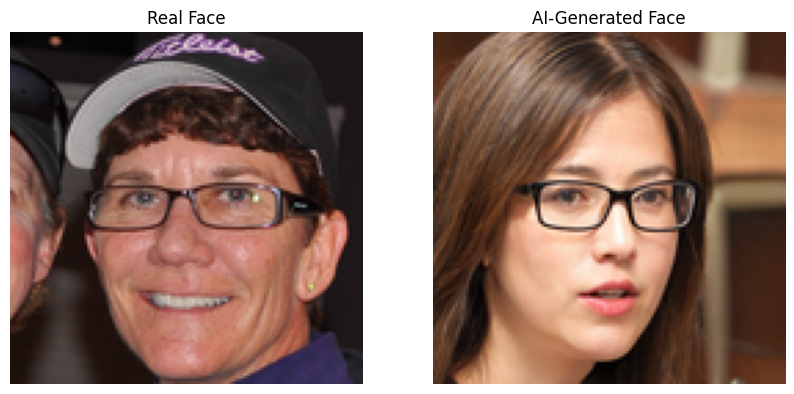

In [ ]:
print(f"Number of real face images: {len(real_faces)}")
print(f"Number of AI-generated face images: {len(ai_faces)}")

# Display a sample image from each dataset
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(real_faces[0])
plt.title('Real Face')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ai_faces[0])
plt.title('AI-Generated Face')
plt.axis('off')

plt.show()


# To equalize the dataset

In [ ]:
import random

In [ ]:
def equalize_datasets(real_faces, ai_faces):
    # Determine the smaller dataset size
    min_size = min(len(real_faces), len(ai_faces))

    # Randomly sample from the larger dataset to match the size of the smaller dataset
    if len(real_faces) > min_size:
        real_faces = random.sample(list(real_faces), min_size)
    if len(ai_faces) > min_size:
        ai_faces = random.sample(list(ai_faces), min_size)

    return np.array(real_faces), np.array(ai_faces)

# Equalize the datasets
real_faces, ai_faces = equalize_datasets(real_faces, ai_faces)

# Verify the new sizes
print(f"Number of real face images after equalization: {len(real_faces)}")
print(f"Number of AI-generated face images after equalization: {len(ai_faces)}")


Number of real face images after equalization: 8061
Number of AI-generated face images after equalization: 8061


# Display a sample image from each dataset

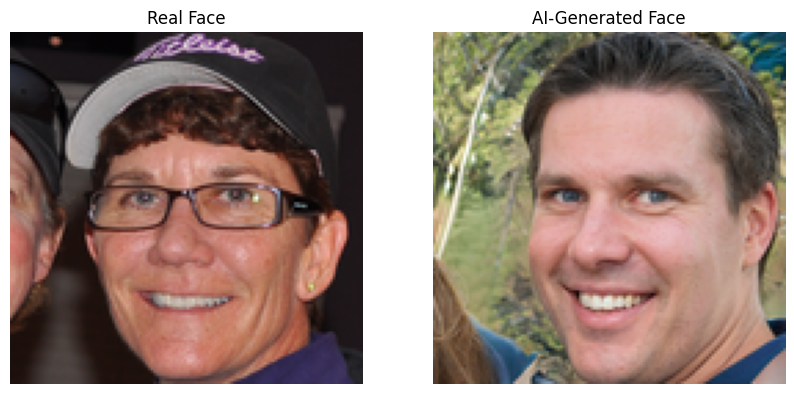

In [ ]:
# Display a sample image from each dataset after equalization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(real_faces[0])
plt.title('Real Face')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ai_faces[0])
plt.title('AI-Generated Face')
plt.axis('off')

plt.show()


# EXPLORATORY DATA ANALYSIS(EDA)

# VISUALIZE SAMPLE IMAGES

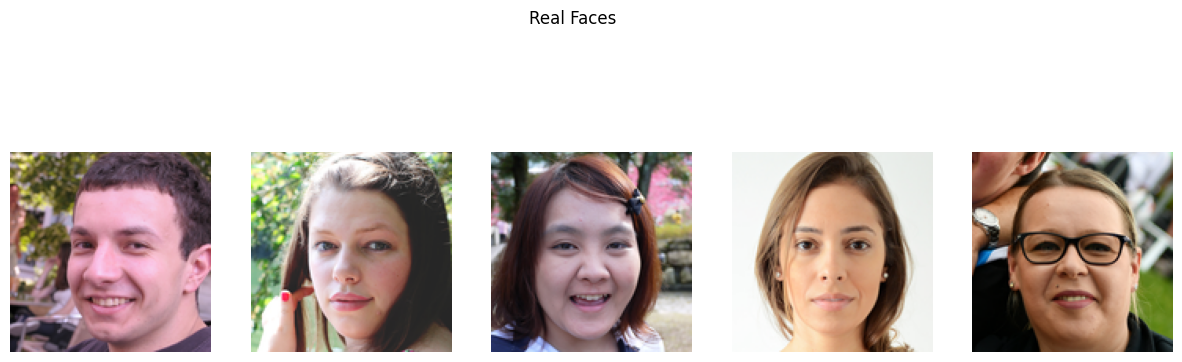

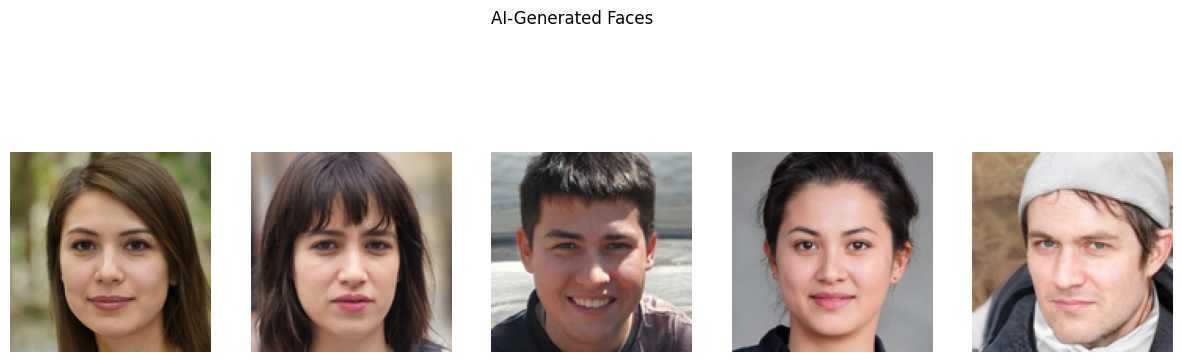

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image

def visualize_samples(image_data, title, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        img = random.choice(image_data)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Assuming real_faces and ai_faces contain the resized and cleaned image data
visualize_samples(real_faces, 'Real Faces')
visualize_samples(ai_faces, 'AI-Generated Faces')


# Analyze Image Size and Aspect Ratio

Real Faces - Image Size Statistics:
Width - Mean: 128.0, Median: 128.0, Min: 128, Max: 128
Height - Mean: 128.0, Median: 128.0, Min: 128, Max: 128
Aspect Ratio - Mean: 1.0, Median: 1.0, Min: 1.0, Max: 1.0


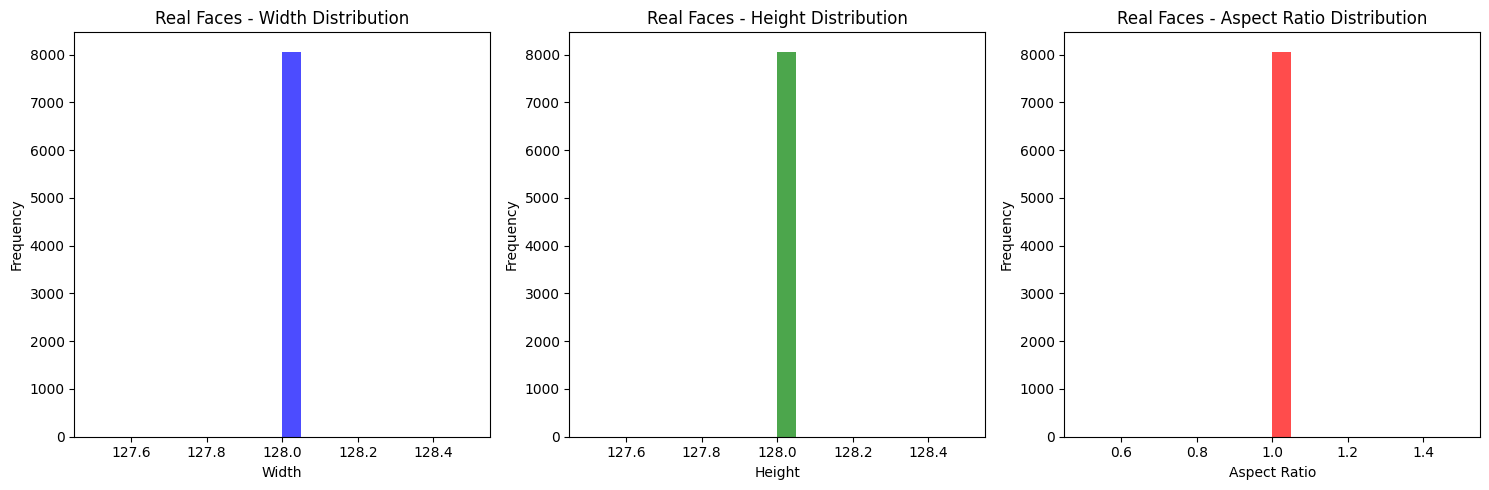

AI-Generated Faces - Image Size Statistics:
Width - Mean: 128.0, Median: 128.0, Min: 128, Max: 128
Height - Mean: 128.0, Median: 128.0, Min: 128, Max: 128
Aspect Ratio - Mean: 1.0, Median: 1.0, Min: 1.0, Max: 1.0


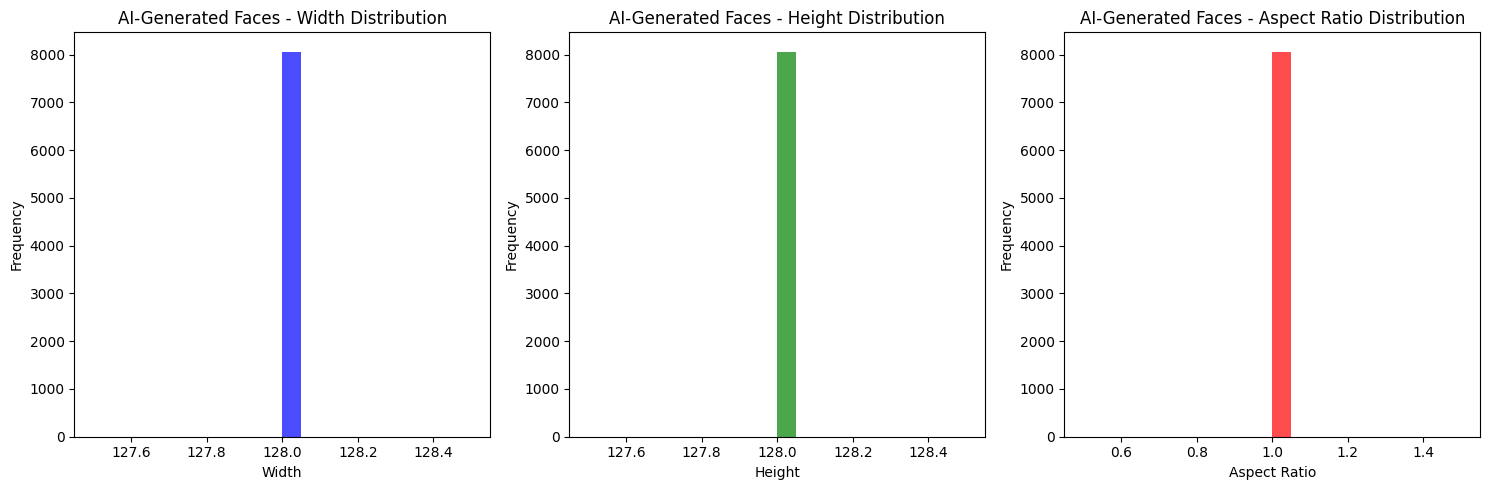

In [ ]:
def analyze_image_sizes(image_data, title):
    widths = [img.shape[1] for img in image_data]
    heights = [img.shape[0] for img in image_data]
    aspect_ratios = [w / h for w, h in zip(widths, heights)]

    print(f"{title} - Image Size Statistics:")
    print(f"Width - Mean: {np.mean(widths)}, Median: {np.median(widths)}, Min: {np.min(widths)}, Max: {np.max(widths)}")
    print(f"Height - Mean: {np.mean(heights)}, Median: {np.median(heights)}, Min: {np.min(heights)}, Max: {np.max(heights)}")
    print(f"Aspect Ratio - Mean: {np.mean(aspect_ratios)}, Median: {np.median(aspect_ratios)}, Min: {np.min(aspect_ratios)}, Max: {np.max(aspect_ratios)}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(widths, bins=20, color='blue', alpha=0.7)
    plt.title(f'{title} - Width Distribution')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(heights, bins=20, color='green', alpha=0.7)
    plt.title(f'{title} - Height Distribution')
    plt.xlabel('Height')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.hist(aspect_ratios, bins=20, color='red', alpha=0.7)
    plt.title(f'{title} - Aspect Ratio Distribution')
    plt.xlabel('Aspect Ratio')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Analyze image sizes and aspect ratios
analyze_image_sizes(real_faces, 'Real Faces')
analyze_image_sizes(ai_faces, 'AI-Generated Faces')


# Image Preprocessing Techniques

In [ ]:
import cv2

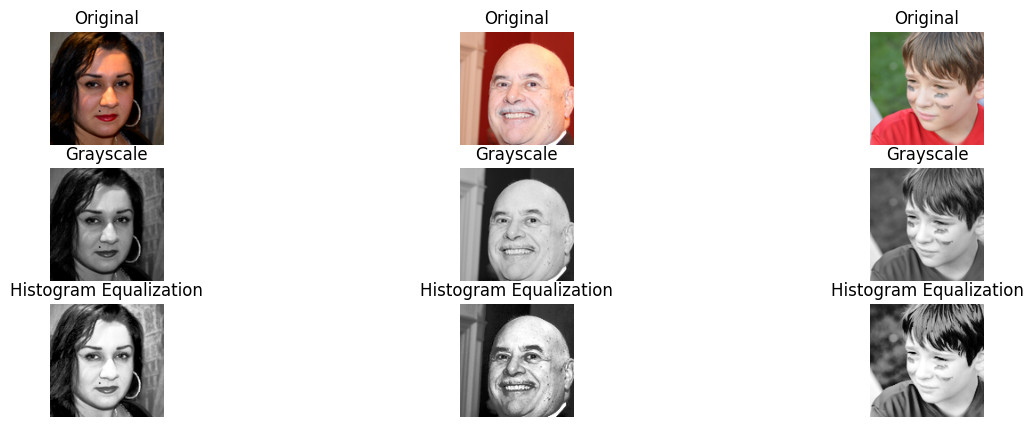

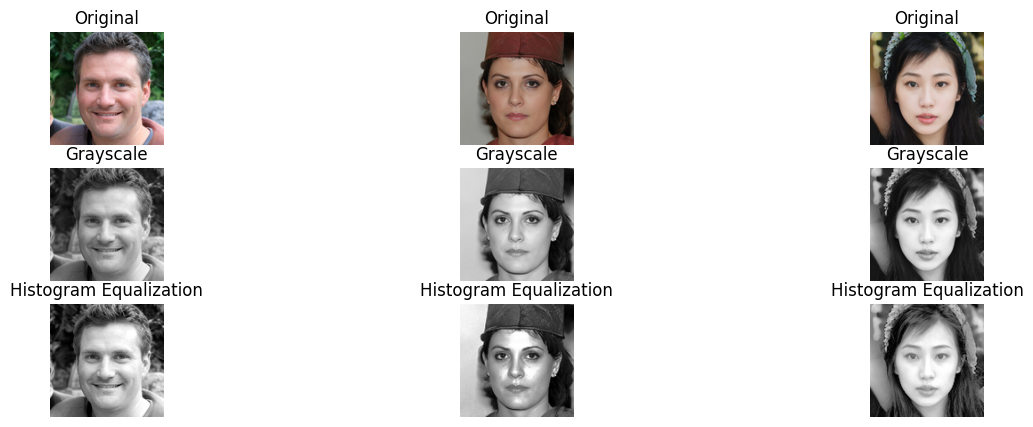

In [ ]:
def preprocess_and_visualize(image_data, n=3):
    plt.figure(figsize=(15, 5))
    for i, img_arr in enumerate(random.sample(list(image_data), n)):
        img = Image.fromarray(img_arr)

        # Original
        plt.subplot(3, n, i+1)
        plt.imshow(img)
        plt.title('Original')
        plt.axis('off')

        # Grayscale
        gray_img = img.convert('L')
        plt.subplot(3, n, n+i+1)
        plt.imshow(gray_img, cmap='gray')
        plt.title('Grayscale')
        plt.axis('off')

        # Histogram Equalization
        img_arr = np.array(gray_img)
        equalized_img = Image.fromarray(cv2.equalizeHist(img_arr))
        plt.subplot(3, n, 2*n+i+1)
        plt.imshow(equalized_img, cmap='gray')
        plt.title('Histogram Equalization')
        plt.axis('off')

    plt.show()

# Preprocess and visualize
preprocess_and_visualize(real_faces)
preprocess_and_visualize(ai_faces)


# Feature Extraction

In [ ]:
!pip install opencv-python-headless


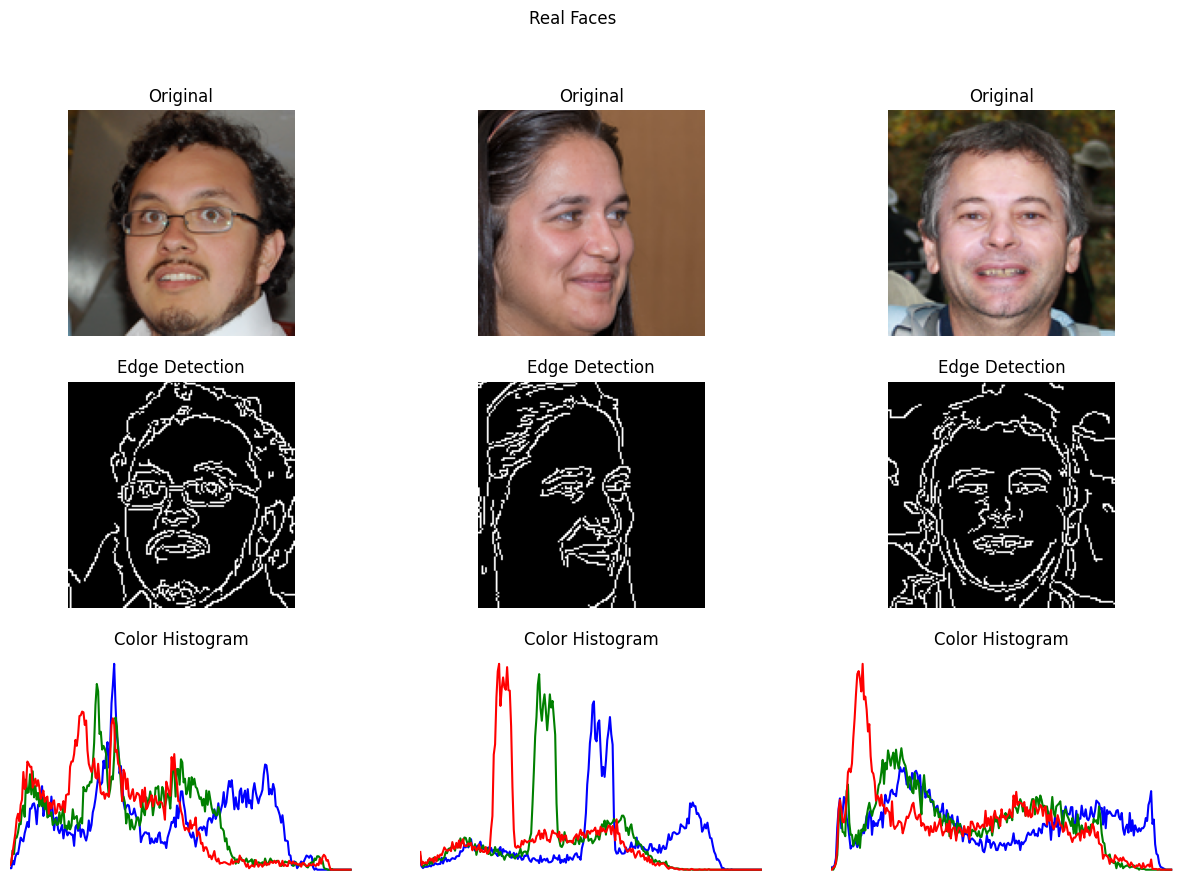

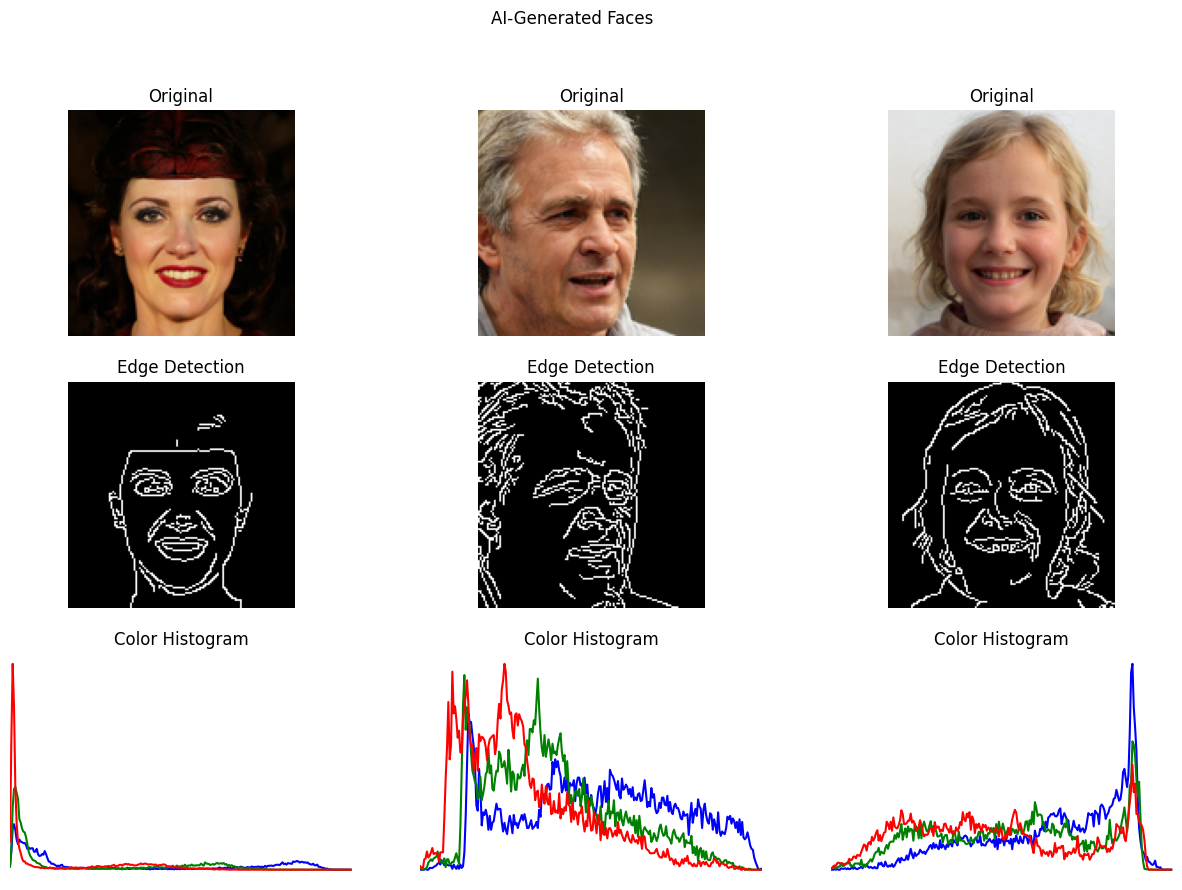

In [ ]:
import cv2
def extract_and_visualize_features(image_data, title, n=3):
    plt.figure(figsize=(15, 10))
    for i, img_arr in enumerate(random.sample(list(image_data), n)):
        img = Image.fromarray(img_arr)

        # Original
        plt.subplot(3, n, i+1)
        plt.imshow(img)
        plt.title('Original')
        plt.axis('off')

        # Edge Detection
        gray_img = np.array(img.convert('L'))
        edges = cv2.Canny(gray_img, 100, 200)
        plt.subplot(3, n, n+i+1)
        plt.imshow(edges, cmap='gray')
        plt.title('Edge Detection')
        plt.axis('off')

        # Color Histogram (for color images)
        if len(img_arr.shape) == 3:  # Check if image is colored
            plt.subplot(3, n, 2*n+i+1)
            colors = ('b', 'g', 'r')
            for j, color in enumerate(colors):
                hist = cv2.calcHist([img_arr], [j], None, [256], [0, 256])
                plt.plot(hist, color=color)
            plt.title('Color Histogram')
            plt.xlim([0, 256])
            plt.axis('off')
        else:  # For grayscale images
            plt.subplot(3, n, 2*n+i+1)
            hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
            plt.plot(hist, color='black')
            plt.title('Grayscale Histogram')
            plt.xlim([0, 256])
            plt.axis('off')

    plt.suptitle(title)
    plt.show()

# Extract and visualize features
extract_and_visualize_features(real_faces, 'Real Faces')
extract_and_visualize_features(ai_faces, 'AI-Generated Faces')


# Class Balance Analysis

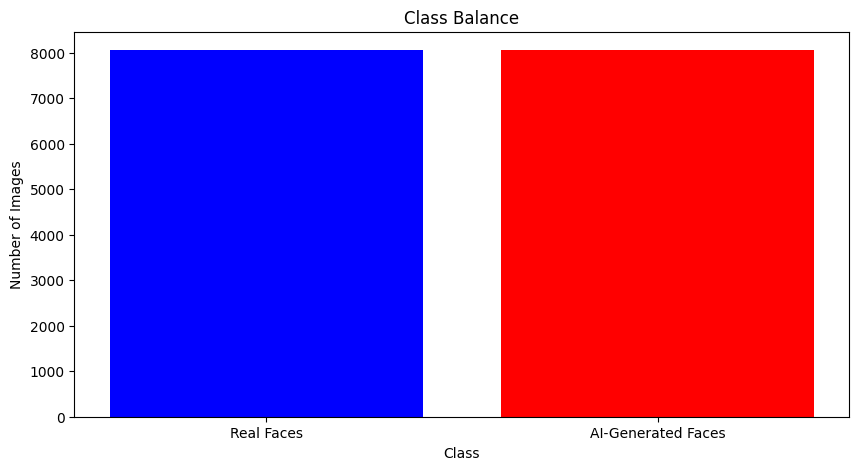

In [ ]:
def analyze_class_balance(real_faces, ai_faces):
    counts = [len(real_faces), len(ai_faces)]
    labels = ['Real Faces', 'AI-Generated Faces']

    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color=['blue', 'red'])
    plt.title('Class Balance')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.show()

# Analyze class balance
analyze_class_balance(real_faces, ai_faces)


# Correlation Analysis

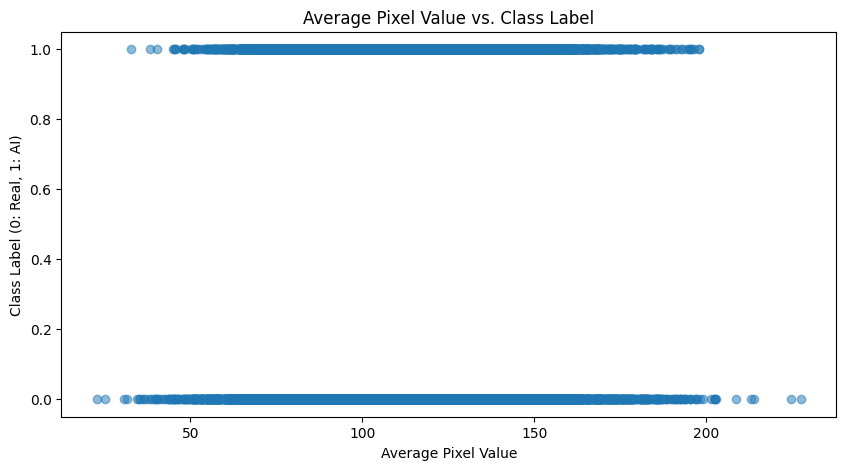

In [ ]:
def compute_avg_pixel_value(image_data):
    return [np.mean(img) for img in image_data]

def plot_correlation(real_faces, ai_faces):
    real_avg_pixel_values = compute_avg_pixel_value(real_faces)
    ai_avg_pixel_values = compute_avg_pixel_value(ai_faces)

    real_labels = [0] * len(real_avg_pixel_values)
    ai_labels = [1] * len(ai_avg_pixel_values)

    avg_pixel_values = real_avg_pixel_values + ai_avg_pixel_values
    labels = real_labels + ai_labels

    plt.figure(figsize=(10, 5))
    plt.scatter(avg_pixel_values, labels, alpha=0.5)
    plt.title('Average Pixel Value vs. Class Label')
    plt.xlabel('Average Pixel Value')
    plt.ylabel('Class Label (0: Real, 1: AI)')
    plt.show()

# Perform correlation analysis
plot_correlation(real_faces, ai_faces)


# Outlier Detection

Detected 396 outliers.


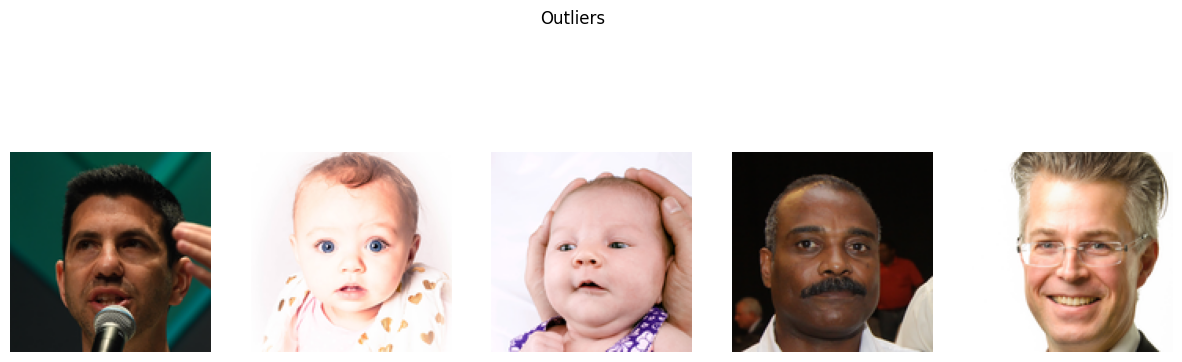

Detected 369 outliers.


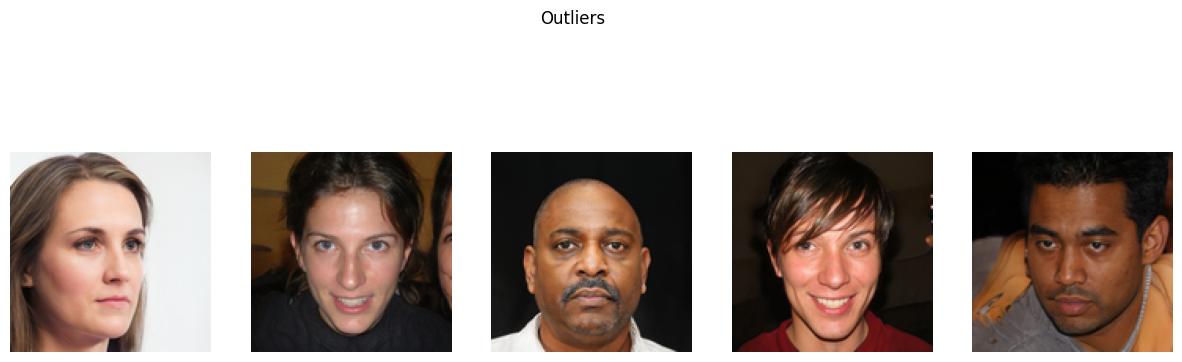

In [ ]:
def detect_and_visualize_outliers(image_data, threshold=2):
    avg_pixel_values = compute_avg_pixel_value(image_data)
    mean = np.mean(avg_pixel_values)
    std_dev = np.std(avg_pixel_values)

    outliers = [img for img, val in zip(image_data, avg_pixel_values) if abs(val - mean) > threshold * std_dev]

    print(f"Detected {len(outliers)} outliers.")
    visualize_samples(outliers, 'Outliers', n=min(5, len(outliers)))

# Detect and visualize outliers
detect_and_visualize_outliers(real_faces)
detect_and_visualize_outliers(ai_faces)


# Label Distribution Analysis

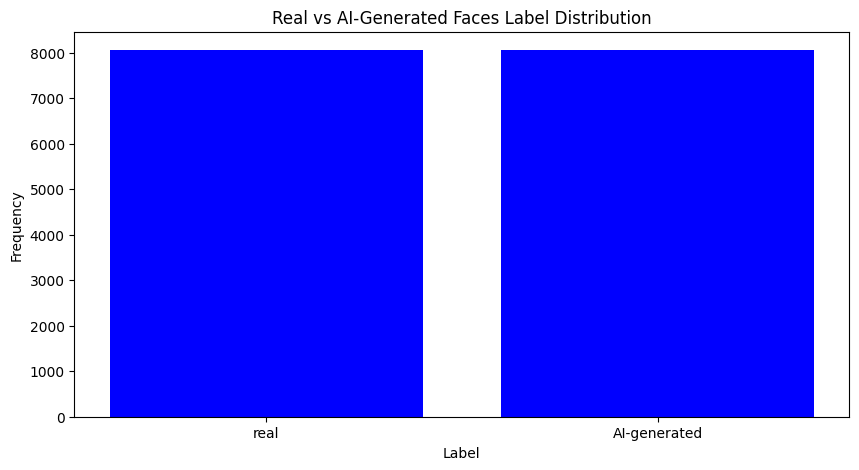

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import resample
real_labels = ['real'] * len(real_faces)
ai_labels = ['AI-generated'] * len(ai_faces)

def analyze_label_distribution(real_data, real_labels, ai_data, ai_labels, title):
    # Combine image data with labels
    real_data_with_labels = list(zip(real_data, real_labels))
    ai_data_with_labels = list(zip(ai_data, ai_labels))

    # Separate data by class
    label_to_data = {}
    for img, label in real_data_with_labels + ai_data_with_labels:
        if label not in label_to_data:
            label_to_data[label] = []
        label_to_data[label].append((img, label))

    # Find the maximum class size
    max_class_size = max(len(images) for images in label_to_data.values())

    # Balance the classes
    balanced_data = []
    for label, images in label_to_data.items():
        if len(images) < max_class_size:
            images = resample(images, replace=True, n_samples=max_class_size, random_state=42)
        balanced_data.extend(images)

    # Count the occurrences of each label in the balanced data
    balanced_labels = [label for _, label in balanced_data]
    label_counts = Counter(balanced_labels)

    # Plot the label distribution
    plt.figure(figsize=(10, 5))
    plt.bar(label_counts.keys(), label_counts.values(), color='blue')
    plt.title(f'{title} Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.show()

# Example usage with hypothetical image data and labels
# Replace `real_faces` with your actual real image data
# Replace `real_labels` with your actual real image labels
# Replace `ai_faces` with your actual AI-generated image data
# Replace `ai_labels` with your actual AI-generated image labels
analyze_label_distribution(real_faces, real_labels, ai_faces, ai_labels, 'Real vs AI-Generated Faces')


# view outliers

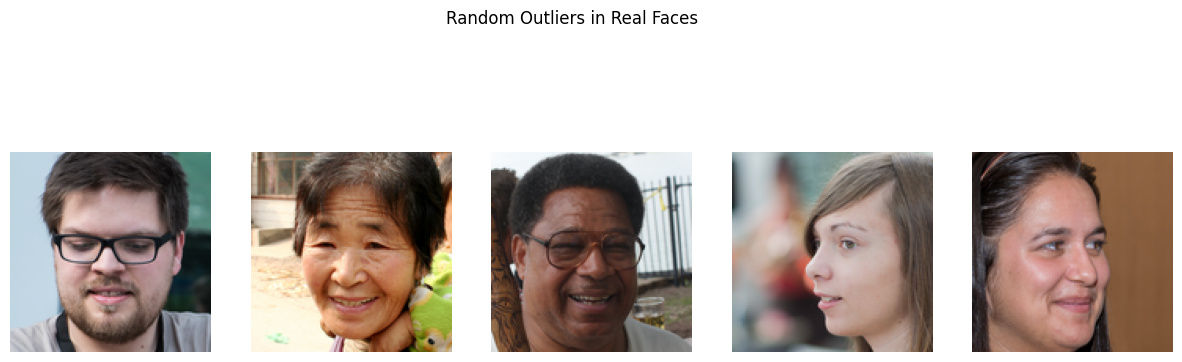

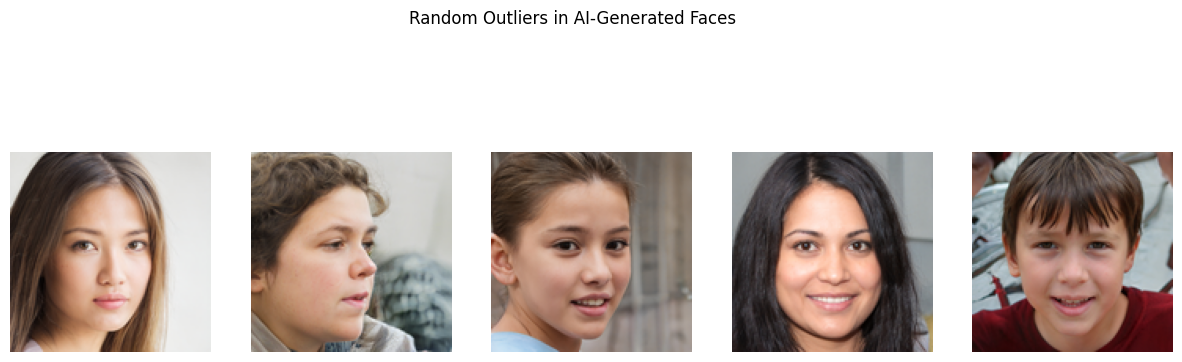

In [ ]:
import random
import matplotlib.pyplot as plt

def visualize_random_outliers(image_data, num_outliers, title):
    plt.figure(figsize=(15, 5))
    for i in range(num_outliers):
        img = random.choice(image_data)
        plt.subplot(1, num_outliers, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Example usage with your datasets
visualize_random_outliers(real_faces, 5, 'Random Outliers in Real Faces')
visualize_random_outliers(ai_faces, 5, 'Random Outliers in AI-Generated Faces')


In [ ]:
print(len(real_faces))
print(len(ai_faces))

8061
8061


# FEATURE ENGINEERING

# Load the MobileNet Model

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model

# Load pre-trained MobileNet model with ImageNet weights
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


17225924/17225924 [==============================] - 0s 0us/step


# Remove the Top classifier so you can input your model

In [ ]:
# Remove the top classification layer
mobilenet_features = mobilenet_model.layers[-1].output
feature_extraction_model = Model(inputs=mobilenet_model.input, outputs=mobilenet_features)


# Use the MobileNet Model to extract features from a batch of images

In [ ]:
from tensorflow.keras.applications.mobilenet import preprocess_input

# Function to extract features from a batch of images
def extract_features(image_data, model):
    # Preprocess the images and convert to numpy array
    preprocessed_images = np.array([preprocess_input(img) for img in image_data])
    # Extract features using the pre-trained model
    features = model.predict(preprocessed_images)
    return features


In [ ]:
import numpy as np

# Function to extract features from a batch of images
def extract_features(image_data, model):
    # Preprocess the images and convert to numpy array
    preprocessed_images = np.array([preprocess_input(img) for img in image_data])
    # Extract features using the pre-trained model
    features = model.predict(preprocessed_images)
    return features

# Example usage for real and AI-generated faces
real_features = extract_features(real_faces, feature_extraction_model)
ai_features = extract_features(ai_faces, feature_extraction_model)


252/252 [==============================] - 2s 10ms/step


# Reshape the features to fit our dataset

In [ ]:
# Reshape the features to 2D arrays
real_features_flat = real_features.reshape(len(real_features), -1)
ai_features_flat = ai_features.reshape(len(ai_features), -1)


# Load the CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def create_cnn_model(input_shape):
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        # Flatten the feature maps
        layers.Flatten(),
        # Fully connected layers
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Binary classification output
    ])
    return model

# Create the CNN model
cnn_model = create_cnn_model(input_shape=(128, 128, 3))

# Compile the model
cnn_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Display the model summary
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

# Train our dataset on our model

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
import os

# Function to load and preprocess a new image
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Function to extract features from a batch of images
def extract_features(image_data, model):
    # Extract features using the pre-trained model
    features = model.predict(image_data)
    return features

# Define the neural network architecture
def create_nn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# Load pre-trained MobileNet model with ImageNet weights
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Remove the top classification layer
mobilenet_features = mobilenet_model.layers[-1].output
feature_extraction_model = Model(inputs=mobilenet_model.input, outputs=mobilenet_features)

# Concatenate features and labels
X = np.concatenate((real_features_flat, ai_features_flat))
y = np.concatenate((np.ones(len(real_features_flat)), np.zeros(len(ai_features_flat))))

# Shuffle the dataset
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the neural network model
input_shape = (real_features_flat.shape[1],)
model = create_nn_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/20
323/323 [==============================] - 3s 6ms/step - loss: 0.7063 - accuracy: 0.5887 - val_loss: 0.5087 - val_accuracy: 0.7682
Epoch 2/20
323/323 [==============================] - 2s 5ms/step - loss: 0.6122 - accuracy: 0.6315 - val_loss: 0.5320 - val_accuracy: 0.7748
Epoch 3/20
323/323 [==============================] - 2s 5ms/step - loss: 0.5617 - accuracy: 0.6637 - val_loss: 0.4295 - val_accuracy: 0.8213
Epoch 4/20
323/323 [==============================] - 2s 5ms/step - loss: 0.5317 - accuracy: 0.6752 - val_loss: 0.4255 - val_accuracy: 0.8256
Epoch 5/20
323/323 [==============================] - 2s 5ms/step - loss: 0.5181 - accuracy: 0.6733 - val_loss: 0.3972 - val_accuracy: 0.8264
Epoch 6/20
323/323 [==============================] - 2s 8ms/step - loss: 0.5047 - accuracy: 0.6820 - val_loss: 0.4227 - val_accuracy: 0.8016
Epoch 7/20
323/323 [==============================] - 2s 8ms/step - loss: 0.4980 - accuracy: 0.6851 - val_loss: 0.4047 - val_accuracy: 0.8349
Epoch 

# Test our model on a new unseen data

In [ ]:
# Path to the new image
new_image_path = '/content/drive/MyDrive/jay_jay.jpg'

# Preprocess the new image
new_image_array = preprocess_image(new_image_path)

# Extract features from the new image using the pre-trained model
new_image_features = extract_features(new_image_array, feature_extraction_model)

# Flatten the extracted features to match the input shape of the neural network
new_image_features_flat = new_image_features.reshape((1, -1))

# Make a prediction on the new image
prediction = model.predict(new_image_features_flat)

# Interpret and print the prediction result
predicted_class = "AI Generated" if prediction > 0.5 else "Real"
print(f'The new image is predicted to be: {predicted_class}')

1/1 [==============================] - 0s 112ms/step
The new image is predicted to be: AI Generated
